In [1]:
!git clone https://github.com/MANY09F4/kaggle-DL-MI.git

Cloning into 'kaggle-DL-MI'...
remote: Enumerating objects: 261, done.
remote: Total 261 (delta 0), reused 0 (delta 0), pack-reused 261 (from 1)
Receiving objects: 100% (261/261), 5.38 MiB | 20.80 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
!ls

drive  kaggle-DL-MI  sample_data


In [5]:
!pip install -r kaggle-DL-MI/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 58.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [6]:
%cd /content/kaggle-DL-MI

/content/kaggle-DL-MI


In [7]:
!git pull

Already up to date.


In [8]:
# import h5py
# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# # Fonction pour afficher les anomalies dans les images
# def analyze_images(h5_path):
#     with h5py.File(h5_path, 'r') as f:
#         # Récupérer toutes les clés (ID des images)
#         all_keys = list(f.keys())

#         # Compteurs pour les anomalies
#         abnormal_images = []
#         total_images = len(all_keys)

#         for img_id in all_keys:
#             img = torch.tensor(f[img_id]['img'][()]).float()

#             # Vérifier la plage des valeurs
#             min_val = img.min().item()
#             max_val = img.max().item()

#             # Si les valeurs sont en dehors de l'intervalle [0, 1], on marque comme aberrant
#             if min_val < 0 or max_val > 1:
#                 abnormal_images.append((img_id, "Plage de valeurs incorrecte"))
#                 continue

#             # Vérifier si l'image est complètement noire (valeurs proches de 0) ou complètement blanche
#             if torch.all(img < 0.1):
#                 abnormal_images.append((img_id, "Image trop noire"))
#                 continue
#             elif torch.all(img > 0.9):
#                 abnormal_images.append((img_id, "Image trop blanche"))
#                 continue

#             # Vérifier si l'image a une taille anormale
#             if img.ndimension() != 3 or img.shape[0] != 3 or img.shape[1] != 96 or img.shape[2] != 96:
#                 abnormal_images.append((img_id, f"Dimension incorrecte: {img.shape}"))
#                 continue

#         # Affichage des anomalies
#         print(f"[INFO] Analyse terminée. Nombre total d'images: {total_images}")
#         print(f"[INFO] Nombre d'images aberrantes: {len(abnormal_images)}")
#         if len(abnormal_images) > 0:
#             for img_id, issue in abnormal_images:
#                 print(f"Image ID: {img_id}, Problème: {issue}")
#         else:
#             print("[INFO] Aucune image aberrante détectée.")

#         return abnormal_images

# # Analyser les images de train et val
# train_path = '/content/drive/MyDrive/kaggle-DL-MI/data/train.h5'
# val_path = '/content/drive/MyDrive/kaggle-DL-MI/data/val.h5'
# test_path = '/content/drive/MyDrive/kaggle-DL-MI/data/test.h5'

# print("Analyse des images d'entraînement :")
# abnormal_train_images = analyze_images(train_path)

# print("\nAnalyse des images de validation :")
# abnormal_val_images = analyze_images(val_path)



In [8]:
import h5py
import torch

# Liste pour stocker les IDs des images aberrantes
list_aberrant_ids_train = []

# Charger les données du fichier h5 (train)
with h5py.File('/content/drive/MyDrive/kaggle-DL-MI/data/train.h5', 'r') as f:
    img_ids = list(f.keys())  # Récupérer tous les IDs des images

    # Itérer sur toutes les images du train
    for img_id in img_ids:
        # Charger l'image
        img = torch.tensor(f[img_id]['img'][()]).float()


        # Vérifier si l'image contient des pixels à valeur 0 (aberrant)
        if (img == 0).sum().item() > 200:
            print(f"Aberrant image found at ID: {img_id} with 0s in the image {(img == 0).sum().item()}")
            list_aberrant_ids_train.append(img_id)

# Afficher les IDs des images aberrantes
print(f"Nombre d'images aberrantes: {len(list_aberrant_ids_train)}")


Aberrant image found at ID: 1008 with 0s in the image 12330
Aberrant image found at ID: 10405 with 0s in the image 16329
Aberrant image found at ID: 11003 with 0s in the image 20311
Aberrant image found at ID: 11227 with 0s in the image 12749
Aberrant image found at ID: 11249 with 0s in the image 18529
Aberrant image found at ID: 12613 with 0s in the image 15222
Aberrant image found at ID: 13024 with 0s in the image 13707
Aberrant image found at ID: 14027 with 0s in the image 14212
Aberrant image found at ID: 14308 with 0s in the image 14685
Aberrant image found at ID: 14368 with 0s in the image 14934
Aberrant image found at ID: 14588 with 0s in the image 14908
Aberrant image found at ID: 14610 with 0s in the image 1408
Aberrant image found at ID: 14762 with 0s in the image 13010
Aberrant image found at ID: 15163 with 0s in the image 16890
Aberrant image found at ID: 15363 with 0s in the image 13824
Aberrant image found at ID: 15473 with 0s in the image 15074
Aberrant image found at ID

In [9]:
# Liste pour stocker les IDs des images aberrantes
list_aberrant_ids_val = []

# Charger les données du fichier h5 (train)
with h5py.File('/content/drive/MyDrive/kaggle-DL-MI/data/val.h5', 'r') as f:
    img_ids = list(f.keys())  # Récupérer tous les IDs des images

    # Itérer sur toutes les images du train
    for img_id in img_ids:
        # Charger l'image
        img = torch.tensor(f[img_id]['img'][()]).float()

        # Vérifier si l'image contient des pixels à valeur 0 (aberrant)
        if (img == 0).sum().item() > 200:
            print(f"Aberrant image found at ID: {img_id} with 0s in the image")
            list_aberrant_ids_val.append(img_id)

# Afficher les IDs des images aberrantes
print(f"Nombre d'images aberrantes: {len(list_aberrant_ids_val)}")

Aberrant image found at ID: 17692 with 0s in the image
Aberrant image found at ID: 17750 with 0s in the image
Aberrant image found at ID: 18180 with 0s in the image
Aberrant image found at ID: 18197 with 0s in the image
Aberrant image found at ID: 18275 with 0s in the image
Aberrant image found at ID: 18407 with 0s in the image
Aberrant image found at ID: 18914 with 0s in the image
Aberrant image found at ID: 19124 with 0s in the image
Aberrant image found at ID: 19187 with 0s in the image
Aberrant image found at ID: 19265 with 0s in the image
Aberrant image found at ID: 19397 with 0s in the image
Aberrant image found at ID: 19465 with 0s in the image
Aberrant image found at ID: 19583 with 0s in the image
Aberrant image found at ID: 19913 with 0s in the image
Aberrant image found at ID: 20185 with 0s in the image
Aberrant image found at ID: 20211 with 0s in the image
Aberrant image found at ID: 20237 with 0s in the image
Aberrant image found at ID: 20567 with 0s in the image
Aberrant i

In [ ]:
# Liste pour stocker les IDs des images aberrantes
list_aberrant_ids_test = []

# Charger les données du fichier h5 (train)
with h5py.File('/content/drive/MyDrive/kaggle-DL-MI/data/test.h5', 'r') as f:
    img_ids = list(f.keys())  # Récupérer tous les IDs des images

    # Itérer sur toutes les images du train
    for img_id in img_ids:
        # Charger l'image
        img = torch.tensor(f[img_id]['img'][()]).float()

        # Vérifier si l'image contient des pixels à valeur 0 (aberrant)
        if (img == 0).sum().item() > 200:
            print(f"Aberrant image found at ID: {img_id} with 0s in the image")
            list_aberrant_ids_test.append(img_id)

# Afficher les IDs des images aberrantes
print(f"Nombre d'images aberrantes: {len(list_aberrant_ids_test)}")

Nombre d'images aberrantes: 0


In [10]:
list_aberrant_ids = list_aberrant_ids_train + list_aberrant_ids_val
len(list_aberrant_ids)

473

In [11]:
len(set(list_aberrant_ids))

473

In [12]:
str_aberrant_ids = ",".join(map(str, list_aberrant_ids))
str_aberrant_ids

'1008,10405,11003,11227,11249,12613,13024,14027,14308,14368,14588,14610,14762,15163,15363,15473,16115,16528,16574,16837,17180,17674,17839,17856,18119,18344,18381,18482,18720,188,18903,19152,19367,19637,20133,2016,20255,20733,20807,20856,21084,21564,21760,22483,22563,22638,22722,22994,23292,2334,23404,23452,23489,23825,25004,25288,25925,26326,27272,2729,27307,27858,2822,28369,28409,28532,28620,2890,29117,29271,29375,30303,3076,31041,31050,31599,31649,31955,32269,32376,32382,32590,32766,3281,33019,33477,33478,33501,34234,34342,3478,35027,35236,3524,35308,35630,3564,36530,36578,36759,36961,36984,37205,37298,37670,37761,37905,38177,38487,38592,38715,39074,39085,39620,3982,40566,40911,41181,41568,42067,42162,42199,4295,42984,43015,43305,43422,43439,44136,4417,44766,44915,44959,4501,45363,45404,45743,4584,46906,46948,47578,47583,47650,47806,48078,48192,48340,48730,49306,49382,49408,49774,49903,50062,50431,50623,50647,50712,50930,51113,51243,51262,51428,51484,51721,5176,5219,52743,5280,52841,

In [13]:
!git pull

Already up to date.


In [ ]:
!python -m test_caille_CycleGAN.train_CycleGAN \
  --train_path "/content/drive/MyDrive/kaggle-DL-MI/data/train.h5" \
  --val_path "/content/drive/MyDrive/kaggle-DL-MI/data/val.h5" \
  --test_path "/content/drive/MyDrive/kaggle-DL-MI/data/test.h5" \
  --name test_run_domain_0 \
  --batch_size 32 \
  --gpu_ids 0 \
  --n_epochs 2 \
  --n_epochs_decay 2 \
  --lr_G 0.0002 \
  --lr_D 0.0002 \
  --save_epoch_freq 1 \
  --display_id 0 \
  --lambda_A 10.0 \
  --lambda_B 10.0 \
  --lambda_identity 0.5 \
  --gan_mode lsgan \
  --domain 0 \
  --color_augment \
  --brightness 0.0 \
  --contrast 0.0 \
  --saturation 0.0 \
  --hue 0.0 \
  --aberrant_ids "$str_aberrant_ids"




[INFO] Options : Namespace(dataroot='', name='test_run_domain_0', gpu_ids=0, model='multistain_cyclegan', direction='AtoB', batch_size=32, input_nc=3, output_nc=3, ngf=64, ndf=64, netG='resnet_9blocks', netD='basic', norm='instance', no_dropout=False, init_type='normal', init_gain=0.02, dataset_mode='unaligned', color_augment=True, brightness=0.0, contrast=0.0, saturation=0.0, hue=0.0, gan_mode='lsgan', pool_size=50, D_thresh=False, D_thresh_value=0.5, n_layers_D=3, lr_policy='linear', lr_decay_iters=50, display_id=0, display_winsize=256, display_port=8097, display_server='http://localhost', display_env='main', display_ncols=4, no_html=False, checkpoints_dir='./checkpoints', epoch_count=1, n_epochs=2, n_epochs_decay=2, lr_G=0.0002, lr_D=0.0002, beta1=0.5, netD_opt='adam', print_freq=100, save_epoch_freq=1, lambda_A=10.0, lambda_B=10.0, lambda_identity=0.5, max_items_A=None, max_items_B=None, train_path='/content/drive/MyDrive/kaggle-DL-MI/data/train.h5', val_path='/content/drive/MyDriv

In [ ]:
# 2. Télécharger depuis Colab
!zip -r /content/checkpoints_domain_0.zip /content/kaggle-DL-MI/checkpoints
from google.colab import files
files.download('/content/checkpoints_domain_0.zip')

  adding: content/kaggle-DL-MI/checkpoints/ (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/ (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/index.html (deflated 95%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/ (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch001_rec_A.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch001_real_B.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch001_fake_B.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch004_fake_B.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch004_real_B.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch001_gray_B.png (deflated 2%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch002_real_B.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/epoch004_idt_A.png (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/web/images/ep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!python -m test_caille_CycleGAN.train_CycleGAN \
  --train_path "/content/drive/MyDrive/kaggle-DL-MI/data/train.h5" \
  --val_path "/content/drive/MyDrive/kaggle-DL-MI/data/val.h5" \
  --test_path "/content/drive/MyDrive/kaggle-DL-MI/data/test.h5" \
  --name test_run_domain_3 \
  --batch_size 32 \
  --gpu_ids 0 \
  --n_epochs 2 \
  --n_epochs_decay 2 \
  --lr_G 0.0002 \
  --lr_D 0.0002 \
  --save_epoch_freq 1 \
  --display_id 0 \
  --lambda_A 10.0 \
  --lambda_B 10.0 \
  --lambda_identity 0.5 \
  --gan_mode lsgan \
  --domain 3 \
  --color_augment \
  --brightness 0.0 \
  --contrast 0.0 \
  --saturation 0.0 \
  --hue 0.0 \
  --aberrant_ids "$str_aberrant_ids"



[INFO] Options : Namespace(dataroot='', name='test_run_domain_3', gpu_ids=0, model='multistain_cyclegan', direction='AtoB', batch_size=32, input_nc=3, output_nc=3, ngf=64, ndf=64, netG='resnet_9blocks', netD='basic', norm='instance', no_dropout=False, init_type='normal', init_gain=0.02, dataset_mode='unaligned', color_augment=True, brightness=0.0, contrast=0.0, saturation=0.0, hue=0.0, gan_mode='lsgan', pool_size=50, D_thresh=False, D_thresh_value=0.5, n_layers_D=3, lr_policy='linear', lr_decay_iters=50, display_id=0, display_winsize=256, display_port=8097, display_server='http://localhost', display_env='main', display_ncols=4, no_html=False, checkpoints_dir='./checkpoints', epoch_count=1, n_epochs=2, n_epochs_decay=2, lr_G=0.0002, lr_D=0.0002, beta1=0.5, netD_opt='adam', print_freq=100, save_epoch_freq=1, lambda_A=10.0, lambda_B=10.0, lambda_identity=0.5, max_items_A=None, max_items_B=None, train_path='/content/drive/MyDrive/kaggle-DL-MI/data/train.h5', val_path='/content/drive/MyDriv

In [15]:
# 2. Télécharger depuis Colab
!zip -r /content/checkpoints_domain_3.zip /content/kaggle-DL-MI/checkpoints
from google.colab import files
files.download('/content/checkpoints_domain_3.zip')

  adding: content/kaggle-DL-MI/checkpoints/ (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/ (stored 0%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netG_A_epoch4.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_A_epoch2.pth (deflated 8%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_A_epoch4.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netG_A_epoch2.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_B_epoch3.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_B_epoch4.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netG_B_epoch4.pth (deflated 7%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_B_epoch2.pth (deflated 8%)
  adding: content/kaggle-DL-MI/checkpoints/test_run_domain_3/netD_B_epoch1.pth (deflated 8%)
  adding: content/kaggle-DL-MI/ch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python -m test_caille_CycleGAN.train_CycleGAN \
  --train_path "/content/drive/MyDrive/kaggle-DL-MI/data/train.h5" \
  --val_path "/content/drive/MyDrive/kaggle-DL-MI/data/val.h5" \
  --test_path "/content/drive/MyDrive/kaggle-DL-MI/data/test.h5" \
  --name test_run_domain_4 \
  --batch_size 32 \
  --gpu_ids 0 \
  --n_epochs 2 \
  --n_epochs_decay 2 \
  --lr_G 0.0002 \
  --lr_D 0.0002 \
  --save_epoch_freq 1 \
  --display_id 0 \
  --lambda_A 10.0 \
  --lambda_B 10.0 \
  --lambda_identity 0.5 \
  --gan_mode lsgan \
  --domain 4 \
  --color_augment \
  --brightness 0.0 \
  --contrast 0.0 \
  --saturation 0.0 \
  --hue 0.0 \
  --aberrant_ids "$str_aberrant_ids"


In [ ]:
# 2. Télécharger depuis Colab
!zip -r /content/checkpoints_domain_4.zip /content/kaggle-DL-MI/checkpoints/test_run_domain_4
from google.colab import files
files.download('/content/checkpoints_domain_4.zip')

In [ ]:
!python -m test_caille_CycleGAN.train_CycleGAN \
  --train_path "/content/drive/MyDrive/kaggle-DL-MI/data/train.h5" \
  --val_path "/content/drive/MyDrive/kaggle-DL-MI/data/val.h5" \
  --test_path "/content/drive/MyDrive/kaggle-DL-MI/data/test.h5" \
  --name test_run_domain_1 \
  --batch_size 32 \
  --gpu_ids 0 \
  --n_epochs 2 \
  --n_epochs_decay 2 \
  --lr_G 0.0002 \
  --lr_D 0.0002 \
  --save_epoch_freq 1 \
  --display_id 0 \
  --lambda_A 10.0 \
  --lambda_B 10.0 \
  --lambda_identity 0.5 \
  --gan_mode lsgan \
  --domain 1 \
  --color_augment \
  --brightness 0.0 \
  --contrast 0.0 \
  --saturation 0.0 \
  --hue 0.0 \
  --aberrant_ids "$str_aberrant_ids"

In [ ]:
# 2. Télécharger depuis Colab
!zip -r /content/checkpoints_domain_1.zip /content/kaggle-DL-MI/checkpoints/test_run_domain_1
from google.colab import files
files.download('/content/checkpoints_domain_1.zip')

In [14]:
!pwd

/content/kaggle-DL-MI


(96, 96, 3)
1.0 0.24707031


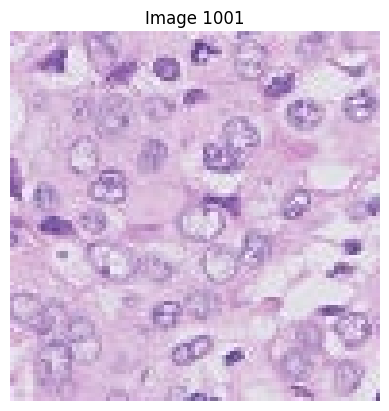

In [15]:
import h5py
import torch
import matplotlib.pyplot as plt
import numpy as np

# Charger une image depuis train.h5 (domaine A)
h5_path = "/content/drive/MyDrive/kaggle-DL-MI/data/train.h5"
index = 15  # Choisis ton index

with h5py.File(h5_path, 'r') as f:
    key = list(f.keys())[index]
    img = torch.tensor(f[key]['img'][()])  # [H, W, C] ou [3, H, W]

# Repasser au format [C, H, W] si besoin
if img.ndim == 3 and img.shape[-1] == 3:
    img = img.permute(2, 0, 1)
    print("3 en dernier")

# Convertir l’image en float32 pour matplotlib
img_np = img.permute(1, 2, 0).float().numpy()  # [H, W, C] en float32
print(img_np.shape)
print(np.max(img_np), np.min(img_np))
# Afficher
plt.imshow(img_np)
plt.title(f"Image {key}")
plt.axis("off")
plt.show()



In [17]:
from test_caille_CycleGAN import networks

# Charger le générateur G_A (A → B)
net_GA = networks.define_G(3, 3, 64, 'resnet_9blocks', 'instance',
                        True, "normal", 0.02, [0])
state_dict = torch.load(
    "/content/kaggle-DL-MI/netG_A_epoch10.pth",
    map_location='cpu'
)
net_GA.load_state_dict(state_dict)
net_GA.eval()  # Mode évaluation

initialize network with normal


DataParallel(
  (module): ResnetGenerator(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace=True)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace=True)
      (10): ResnetBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
          (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (3): ReLU(in

normal -1 1
fake_B shape: torch.Size([1, 3, 96, 96])
fake_B range: min = -0.7259669899940491 , max = 0.8751561641693115


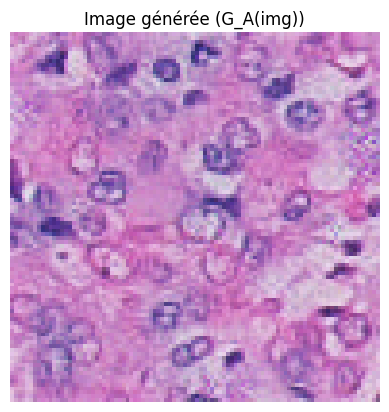

In [18]:
from test_caille_CycleGAN.util.util import tensor2im
import numpy as np

# Normaliser l’image dans [-1, 1]
if img.max() <= 1.0:
    img = img.float() * 2.0 - 1.0
    print("normal -1 1")
else:
    img = img.float() / 127.5 - 1.0

# Ajouter la dimension batch
img_input = img.unsqueeze(0)

# Génération avec G_A : domaine A → B
with torch.no_grad():
    fake_B = net_GA(img_input)

print("fake_B shape:", fake_B.shape)
print("fake_B range: min =", fake_B.min().item(), ", max =", fake_B.max().item())

# Si tu veux l'afficher :
fake_B_np = ((fake_B.squeeze().cpu().numpy().transpose(1, 2, 0) + 1) / 2.0 * 255.0).astype(np.uint8)
plt.imshow(fake_B_np)
plt.title("Image générée (G_A(img))")
plt.axis("off")
plt.show()


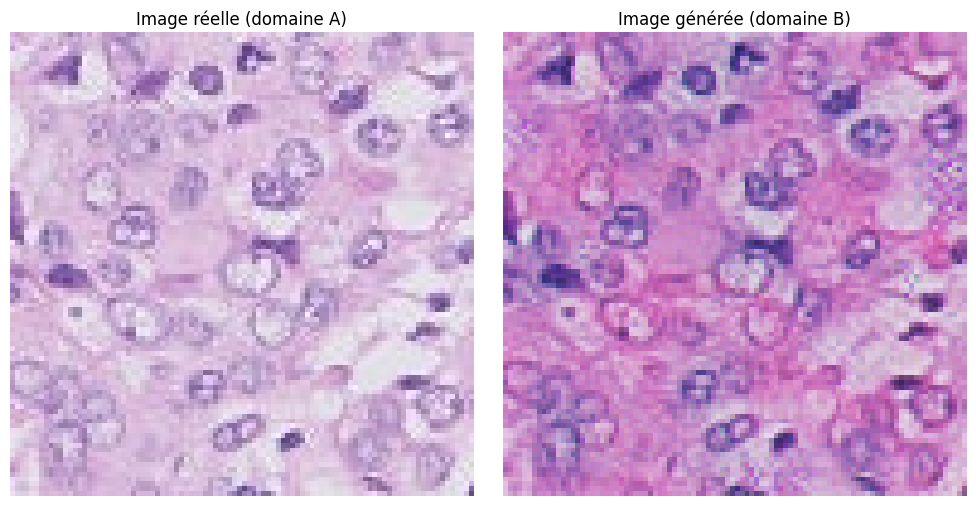

In [19]:
import matplotlib.pyplot as plt

# Assure-toi que les deux sont en [H, W, C] et de type float32 dans [0, 1]
# img_np = image réelle d'entrée
# fake_B_np = image générée (output du générateur)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image d'origine (train A)
axes[0].imshow(img_np)
axes[0].set_title("Image réelle (domaine A)")
axes[0].axis("off")

# Image transformée par le générateur
axes[1].imshow(fake_B_np)
axes[1].set_title("Image générée (domaine B)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [20]:
feature_extractor = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14').to("cuda")


Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 188MB/s]


In [21]:
from torchvision import transforms

fake_B = fake_B.squeeze(0)  # Remove batch dimension -> [3, 96, 96]
fake_B = (fake_B + 1) / 2.0  # Rescale to [0, 1]

# Prépare l'image (normalisation et redimensionnement)
transform = transforms.Compose([

    transforms.Resize((98,98))
])

fake_B = transform(fake_B)
fake_B = fake_B.unsqueeze(0)

# Initialize the feature extractor (DinoV2)
feature_extractor.eval()  # Set it to eval mode

# Extraire les caractéristiques avec DinoV2
with torch.no_grad():  # Pas de calcul des gradients
    features = feature_extractor(fake_B)



In [22]:
features.shape

torch.Size([1, 384])

In [27]:
from torchvision import transforms
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import random

# Liste des IDs d'images aberrantes (remplir avec vos IDs réels)
aberrant_train_ids = list_aberrant_ids_train  # IDs des images aberrantes du train
aberrant_val_ids = list_aberrant_ids_val  # IDs des images aberrantes du val

# Transformation (redimensionner à 98x98)
transform = None

class H5UnalignedDataset(Dataset):
    def __init__(self, h5_path, transform=None, aberrant_ids_train=None, aberrant_ids_val=None, net_GA=None, train=True):
        super().__init__()
        self.h5_path = h5_path
        self.transform = transform
        self.aberrant_ids_train = aberrant_ids_train or []  # Liste des images aberrantes à exclure
        self.aberrant_ids_val = aberrant_ids_val or []
        self.net_GA = net_GA  # Générateur pré-entrainé (net_GA)

        random.seed(42)

        # Charger les clés d'images
        with h5py.File(self.h5_path, 'r') as f:
            self.img_ids = list(f.keys())

        # Filtrer les images aberrantes
        if train:
            self.img_ids = [img_id for img_id in self.img_ids if img_id not in self.aberrant_ids_train]
        else:
            self.img_ids = [img_id for img_id in self.img_ids if img_id not in self.aberrant_ids_val]

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        with h5py.File(self.h5_path, 'r') as f:
            img = torch.tensor(f[img_id]['img'][()]).float()
            label = np.array(f[img_id].get("label"))  # Extraire le label

        # Appliquer la transformation de redimensionnement si nécessaire
        if self.transform:
            img = self.transform(img)

        # Passer l'image à travers le générateur G_A pour transformer l'image
        if self.net_GA is not None:
            img = img.float() * 2.0 - 1.0
            img = self.net_GA(img.unsqueeze(0))  # Ajouter une dimension de batch
            img = (img + 1) / 2.0  # Rescale à [0, 1]

        return img.squeeze(0), label  # Retourner l'image transformée et le label

# Charger le dataset train et val en excluant les aberrants
train_dataset = H5UnalignedDataset("/content/drive/MyDrive/kaggle-DL-MI/data/train.h5", transform=transform, aberrant_ids_train=aberrant_train_ids, aberrant_ids_val=aberrant_val_ids, train=True, net_GA=net_GA)
val_dataset = H5UnalignedDataset("/content/drive/MyDrive/kaggle-DL-MI/data/val.h5", transform=transform, aberrant_ids_train=aberrant_train_ids, aberrant_ids_val=aberrant_val_ids, train=False, net_GA=net_GA)

# Créer les DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)

In [28]:
len(train_dataset), len(val_dataset)

(99614, 34817)

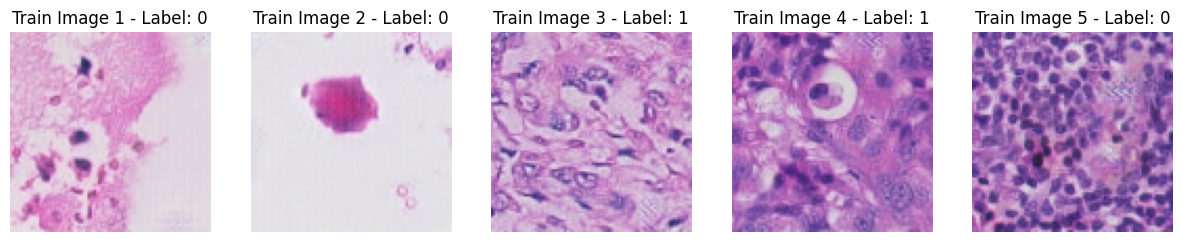

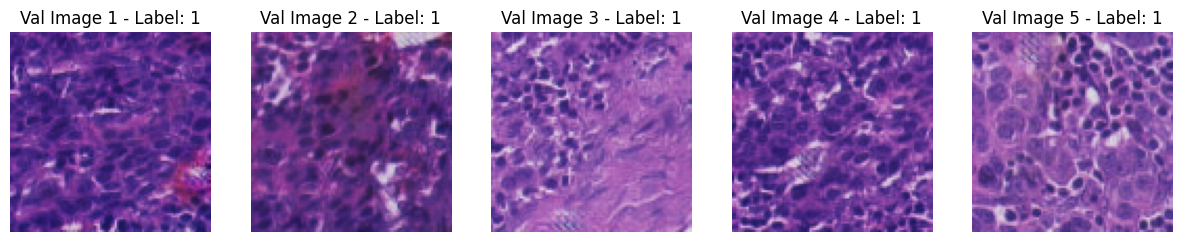

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def show_images_from_dataset(dataset, dataset_name="Train", num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Créer une figure avec plusieurs sous-graphes
    for i in range(num_images):
        img, label = dataset[i]  # Récupérer une image et son label

        # Convertir l'image tensor en numpy array pour l'affichage
        img = img.detach().cpu().numpy().transpose((1, 2, 0))

        # Afficher l'image sur l'axe correspondant
        axes[i].imshow(img)
        axes[i].set_title(f"{dataset_name} Image {i+1} - Label: {label}")
        axes[i].axis('off')  # Désactiver les axes

    plt.show()  # Afficher toutes les images à la fois

# Afficher quelques images du dataset train et val
show_images_from_dataset(train_dataset, "Train")
show_images_from_dataset(val_dataset, "Val")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from torchmetrics.classification import BinaryAccuracy
from tqdm import tqdm

device = "cuda"

transform = transforms.Compose([
    transforms.Resize((98, 98)),  # Convertir en tensor
])

dino_model = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14').to(device)

# Geler toutes les couches sauf les deux dernières
for name, param in dino_model.named_parameters():
    if not ("blocks.10" in name or "blocks.11" in name or "norm" in name or "head" in name):
        param.requires_grad = False

class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, output_size)
        self.dropout = nn.Dropout(p=0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)  # Dernière couche
        x = self.sigmoid(x)  # Activation sigmoïde pour la probabilité
        return x.view(-1)  # Assurer que la sortie a la forme correcte (batch_size,)

feature_dim = 384

# Définir le classificateur
classifier = Classifier(input_size=feature_dim, output_size=1).to(device)

# Optimiseur avec DINO + classifieur
params_to_optimize = list(filter(lambda p: p.requires_grad, dino_model.parameters())) + list(classifier.parameters())


best_val_loss = float('inf')
patience = 5
counter = 0

# Optimiseur avec régularisation L2
optimizer = optim.Adam(params_to_optimize, lr=1e-4, weight_decay=1e-5)
criterion = nn.BCELoss()
accuracy_metric = BinaryAccuracy().to(device)

NUM_EPOCHS = 50  # tu peux augmenter, early stopping gère

for epoch in range(NUM_EPOCHS):
    dino_model.train()
    classifier.train()
    total_loss, total_acc = 0, 0

    for imgs, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        imgs, labels = imgs.to(device), labels.float().to(device)
        imgs = transform(imgs)

        features = dino_model(imgs)
        preds = classifier(features)

        loss = criterion(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = accuracy_metric(preds > 0.5, labels.int())
        total_loss += loss.item() * imgs.size(0)
        total_acc += acc.item() * imgs.size(0)

    avg_loss = total_loss / len(train_dataloader.dataset)
    avg_acc = total_acc / len(train_dataloader.dataset)
    print(f"✅ Train Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")

    # Validation
    dino_model.eval()
    classifier.eval()
    val_loss, val_acc = 0, 0

    with torch.no_grad():
        for imgs, labels in tqdm(val_dataloader, desc="Val Phase"):
            imgs, labels = imgs.to(device), labels.float().to(device)
            imgs = transform(imgs)

            features = dino_model(imgs)
            preds = classifier(features)

            loss = criterion(preds, labels)
            acc = accuracy_metric(preds > 0.5, labels.int())

            val_loss += loss.item() * imgs.size(0)
            val_acc += acc.item() * imgs.size(0)

    avg_val_loss = val_loss / len(val_dataloader.dataset)
    avg_val_acc = val_acc / len(val_dataloader.dataset)
    print(f"🧪 Val Loss: {avg_val_loss:.4f} | Accuracy: {avg_val_acc:.4f}")

    # Early stopping & sauvegarde
    if avg_val_loss < best_val_loss:
        print("📉 Nouvelle meilleure val_loss, sauvegarde du modèle !")
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(classifier.state_dict(), "best_classifier.pth")
        fine_tuned_dino_weights = {
                    k: v.cpu()
                    for k, v in dino_model.state_dict().items()
                    if any(layer in k for layer in ["blocks.10", "blocks.11", "norm", "head"])
                }
        torch.save(fine_tuned_dino_weights, "best_finetuned_dino_layers.pth")
    else:
        counter += 1
        if counter >= patience:
            print(f"⛔️ Early stopping déclenché (patience={patience}) à l'époque {epoch+1}")
            break

Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
Epoch 1/50: 100%|██████████| 390/390 [33:14<00:00,  5.11s/it]


✅ Train Loss: 0.1585 | Accuracy: 0.9490


Val Phase: 100%|██████████| 137/137 [05:49<00:00,  2.55s/it]


🧪 Val Loss: 0.2525 | Accuracy: 0.9035
📉 Nouvelle meilleure val_loss, sauvegarde du modèle !


Epoch 2/50: 100%|██████████| 390/390 [34:06<00:00,  5.25s/it]


✅ Train Loss: 0.0861 | Accuracy: 0.9712


Val Phase: 100%|██████████| 137/137 [05:55<00:00,  2.59s/it]


🧪 Val Loss: 0.3051 | Accuracy: 0.8878


Epoch 3/50: 100%|██████████| 390/390 [33:27<00:00,  5.15s/it]


✅ Train Loss: 0.0669 | Accuracy: 0.9774


Val Phase: 100%|██████████| 137/137 [05:49<00:00,  2.55s/it]


🧪 Val Loss: 0.3163 | Accuracy: 0.8874


Epoch 4/50:   3%|▎         | 10/390 [00:51<32:09,  5.08s/it]

In [26]:
from google.colab import files
files.download("best_classifier.pth")
files.download("best_finetuned_dino_layers.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
classifier.load_state_dict(torch.load("best_classifier.pth", map_location=device))

# Charger les poids sauvegardés
finetuned_weights = torch.load("best_finetuned_dino_layers.pth", map_location=device)

# Appliquer les poids uniquement sur les couches concernées
state_dict = dino_model.state_dict()
state_dict.update(finetuned_weights)  # Remplace les blocs 10, 11, norm, head
dino_model.load_state_dict(state_dict)

In [ ]:
classifier.eval()  # Mettre le modèle en mode évaluation
dino_model.eval()

# Préparer les résultats
solutions_data = {'ID': [], 'Pred': []}

# Charger les images de test
with h5py.File("/content/drive/MyDrive/kaggle-DL-MI/data/test.h5", 'r') as hdf:
    test_ids = list(hdf.keys())

    for test_id in tqdm(test_ids):
        # Récupérer l'image (pas besoin de transformation car elles sont déjà dans le domaine cible)
        img = torch.tensor(np.array(hdf.get(test_id).get('img'))).float()

        # Appliquer la transformation pour DinoV2 (si nécessaire)
        #img_norm = (img + 1) / 2.0  # Recaler l'image entre [0, 1]
        transform = transforms.Compose([
            transforms.Resize((98, 98)),  # Redimensionner à 98x98
        ])

        img_resized = transform(img)

        # Extraire les features avec DinoV2
        with torch.no_grad():
            features = dino_model(img_resized.unsqueeze(0).to('cuda')).squeeze(0)

        # Faire la prédiction avec le classificateur
        pred = classifier(features.unsqueeze(0)).detach().cpu()

        # Stocker les résultats
        solutions_data['ID'].append(int(test_id))
        solutions_data['Pred'].append(int(pred.item() > 0.5))

# Sauvegarder les prédictions dans un fichier CSV
solutions_data = pd.DataFrame(solutions_data).set_index('ID')
solutions_data.to_csv('cycleGAN_fine_tune_dino_submit.csv')

print("Soumission enregistrée dans 'cycleGAN_fine_tune_dino_submit.csv'")


In [ ]:
# Charger le dataset train et val en excluant les aberrants
train_dataset = H5UnalignedDataset("/content/drive/MyDrive/kaggle-DL-MI/data/train.h5", transform=transform, aberrant_ids_train=aberrant_train_ids, aberrant_ids_val=aberrant_val_ids, train=True, net_GA=net_GA)
val_dataset = H5UnalignedDataset("/content/drive/MyDrive/kaggle-DL-MI/data/val.h5", transform=transform, aberrant_ids_train=aberrant_train_ids, aberrant_ids_val=aberrant_val_ids, train=False, net_GA=net_GA)

# Créer les DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from torchmetrics.classification import BinaryAccuracy
from tqdm import tqdm

device = "cuda"

transform = transforms.Compose([
    transforms.Resize((98, 98)),  # Convertir en tensor
])

dino_model = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14').to(device)

# Geler toutes les couches sauf les deux dernières
for name, param in dino_model.named_parameters():
    if not ("blocks.10" in name or "blocks.11" in name or "norm" in name or "head" in name):
        param.requires_grad = False

class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, output_size)
        self.dropout = nn.Dropout(p=0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)  # Dernière couche
        x = self.sigmoid(x)  # Activation sigmoïde pour la probabilité
        return x.view(-1)  # Assurer que la sortie a la forme correcte (batch_size,)

feature_dim = 384

# Définir le classificateur
classifier = Classifier(input_size=feature_dim, output_size=1).to(device)

# Optimiseur avec DINO + classifieur
params_to_optimize = list(filter(lambda p: p.requires_grad, dino_model.parameters())) + list(classifier.parameters())

# Optimiseur avec régularisation L2
optimizer = optim.Adam(params_to_optimize, lr=1e-4, weight_decay=1e-5)
criterion = nn.BCELoss()
accuracy_metric = BinaryAccuracy().to(device)

NUM_EPOCHS = 50  # tu peux augmenter, early stopping gère

for epoch in range(NUM_EPOCHS):
    dino_model.train()
    classifier.train()
    total_loss, total_acc = 0, 0

    for imgs, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        imgs, labels = imgs.to(device), labels.float().to(device)
        imgs = transform(imgs)

        features = dino_model(imgs)
        preds = classifier(features)

        loss = criterion(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = accuracy_metric(preds > 0.5, labels.int())
        total_loss += loss.item() * imgs.size(0)
        total_acc += acc.item() * imgs.size(0)

    avg_loss = total_loss / len(train_dataloader.dataset)
    avg_acc = total_acc / len(train_dataloader.dataset)
    print(f"✅ Train Loss: {avg_loss:.4f} | Accuracy: {avg_acc:.4f}")

torch.save(classifier.state_dict(), "best_classifier_full.pth")
fine_tuned_dino_weights = {
                    k: v.cpu()
                    for k, v in dino_model.state_dict().items()
                    if any(layer in k for layer in ["blocks.10", "blocks.11", "norm", "head"])
                }
torch.save(fine_tuned_dino_weights, "best_finetuned_dino_layers_full.pth")



In [ ]:
import h5py
import numpy as np

# Ouvrir le fichier H5
test_path = '/content/drive/MyDrive/kaggle-DL-MI/data/test.h5'

with h5py.File(test_path, 'r') as f:
    # Afficher les clés du fichier
    #print(f"Clés dans le fichier H5: {list(f.keys())}")

    # Vérifier une image
    img_id = list(f.keys())[12]  # Prendre la première image
    img = np.array(f[img_id]['img'])  # Charger l'image

    # Afficher les informations sur l'image
    print(f"Shape de l'image {img_id}: {img.shape}")  # Dimensions (C, H, W)
    print(f"Type des données de l'image {img_id}: {img.dtype}")  # Type des données
    print(f"Plage de valeurs de l'image {img_id}: min = {img.min()}, max = {img.max()}")  # Valeurs min/max


Shape de l'image 10007: (3, 96, 96)
Type des données de l'image 10007: float16
Plage de valeurs de l'image 10007: min = 0.0863037109375, max = 1.0


In [ ]:
import torch
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm

# Charger le classificateur déjà entraîné
classifier = Classifier(input_size=feature_dim, output_size=1).to('cuda')
classifier.load_state_dict(torch.load("best_classifier.pth", map_location=device))

# Charger les poids sauvegardés
finetuned_weights = torch.load("best_finetuned_dino_layers.pth", map_location=device)

# Appliquer les poids uniquement sur les couches concernées
state_dict = dino_model.state_dict()
state_dict.update(finetuned_weights)  # Remplace les blocs 10, 11, norm, head
dino_model.load_state_dict(state_dict)

classifier.eval()  # Mettre le modèle en mode évaluation
dino_model.eval()

# Préparer les résultats
solutions_data = {'ID': [], 'Pred': []}

# Charger les images de test
with h5py.File("/content/drive/MyDrive/kaggle-DL-MI/data/test.h5", 'r') as hdf:
    test_ids = list(hdf.keys())

    for test_id in tqdm(test_ids):
        # Récupérer l'image (pas besoin de transformation car elles sont déjà dans le domaine cible)
        img = torch.tensor(np.array(hdf.get(test_id).get('img'))).float()

        # Appliquer la transformation pour DinoV2 (si nécessaire)
        #img_norm = (img + 1) / 2.0  # Recaler l'image entre [0, 1]
        transform = transforms.Compose([
            transforms.Resize((98, 98)),  # Redimensionner à 98x98
        ])

        img_resized = transform(img)

        # Extraire les features avec DinoV2
        with torch.no_grad():
            features = dino_model(img_resized.unsqueeze(0).to('cuda')).squeeze(0)

        # Faire la prédiction avec le classificateur
        pred = classifier(features.unsqueeze(0)).detach().cpu()

        # Stocker les résultats
        solutions_data['ID'].append(int(test_id))
        solutions_data['Pred'].append(int(pred.item() > 0.5))

# Sauvegarder les prédictions dans un fichier CSV
solutions_data = pd.DataFrame(solutions_data).set_index('ID')
solutions_data.to_csv('cycleGAN_fine_tune_dino_submit.csv')

print("Soumission enregistrée dans 'cycleGAN_fine_tune_dino_submit.csv'")


100%|██████████| 85054/85054 [20:42<00:00, 68.47it/s]


Soumission enregistrée dans 'cycleGAN_first_submit.csv'


In [ ]:
from google.colab import files

# Télécharger le fichier CSV
files.download('cycleGAN_first_submit.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>